# Step-1: Importing Data

In [163]:
#Supressing warnings and importing required libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [164]:
#Importing dataset

lead_df = pd.read_csv("Leads.csv")
lead_df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

# Step-2: Inspecting Data

In [165]:
# Check the dimensions of dataframe

lead_df.shape

(9240, 37)

In [166]:
# Look at the statistical aspects of dataframe

lead_df.describe(percentiles=[0.25,.50,.75,.99])

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
99%    659592.980000     1.000000    17.000000                  1840.610000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
99%                9.000000                    17.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
99%                     20.000000  
max                     20.000000

In [167]:
# look the datatype of each columns

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [168]:
# Check for unique values in each columns

lead_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [169]:
# Check percentage of null values

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [170]:
#Check and count values of the labels of each remaining categorical columns
for lead_col in lead_df.iloc[:,1:].select_dtypes(include='object').columns:
    print(lead_col)
    print("_____________________________________________________________________________")
    print(lead_df[lead_col].value_counts(normalize= True)*100)
    print("_____________________________________________________________________________")

Lead Origin
_____________________________________________________________________________
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
_____________________________________________________________________________
Lead Source
_____________________________________________________________________________
Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010

# Step-3 Data Preparation & Missing value treatment

In [171]:
#dropping columns with least unique values, i.e., 1

lead_df= lead_df.drop(['Magazine','Receive More Updates About Our Courses',
                       'I agree to pay the amount through cheque','Get updates on DM Content',
                       'Update me on Supply Chain Content'],axis=1)

In [172]:
# Drop the columns with more than or equal to 45% missing values

lead_df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index',
             'Asymmetrique Profile Score'], axis = 1, inplace = True)

        
# Check percentage of null values

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [173]:
# Encoding some binary variable (Yes/No) to 0/1
# List of variables to map

varlist = ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 
           'Newspaper', 'Digital Advertisement', 'A free copy of Mastering The Interview']

#defining the map function

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

#applying the function to the lead dataset

lead_df[varlist] = lead_df[varlist].apply(binary_map)

In [174]:
# Replacing all 'select' values with NaN
lead_df = lead_df.replace('Select', np.nan)

In [175]:
 #Replacing Other with Other_Occupation in the column
lead_df['What is your current occupation'].replace("Other", 'Other_Occupation', inplace = True)
    
#As Lead Quality depends on employees intuition, it's safer to update the NaN to "Not Sure"
lead_df['Lead Quality'].replace(np.nan, 'Not Sure', inplace = True)
    
#We can impute the MUMBAI into all the NULLs as most of the values belong to MUMBAI
lead_df['City'].replace(np.nan, 'Mumbai', inplace = True)
    
#Since there is no significant difference among top 3 specialisation , hence it will be safer to impute NaN with Others
lead_df['Specialization'].replace(np.nan, 'Other_Specialization', inplace = True)

#For Tags column, more than 30% data is for "Will revert after reading the email" and hence we can impute NULLS with Will revert after reading the email
lead_df['Tags'].replace(np.nan, 'Will revert after reading the email', inplace = True)

#More than 99% data is of "Better Career Prospects" and hence it is safer to impute NULLS with this value
lead_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects', inplace = True)

#More than 85% data is of "Unemployed" and hence it is safer to impute NULLS with this value
lead_df['What is your current occupation'].replace(np.nan, 'Unemployed', inplace = True)

#More than 95% data is of "India" and hence it is safer to impute NULLS with this value
lead_df['Country'].replace(np.nan, 'India', inplace = True)

In [176]:
lead_df.drop(lead_df.columns[round(100*lead_df.isnull().sum()/len(lead_df),2)>60], axis = 1, inplace = True)

In [177]:
# Check percentage of null values

round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [178]:
#Remaining NULL values are less than 2%, hence we can directly dropped these rows
lead_df.dropna(inplace = True)

# Step-4: Exploratory Data Analysis

In [179]:
# Check the target variable and analysing it
lead_df.Converted.value_counts(normalize = True)*100

0    62.144589
1    37.855411
Name: Converted, dtype: float64

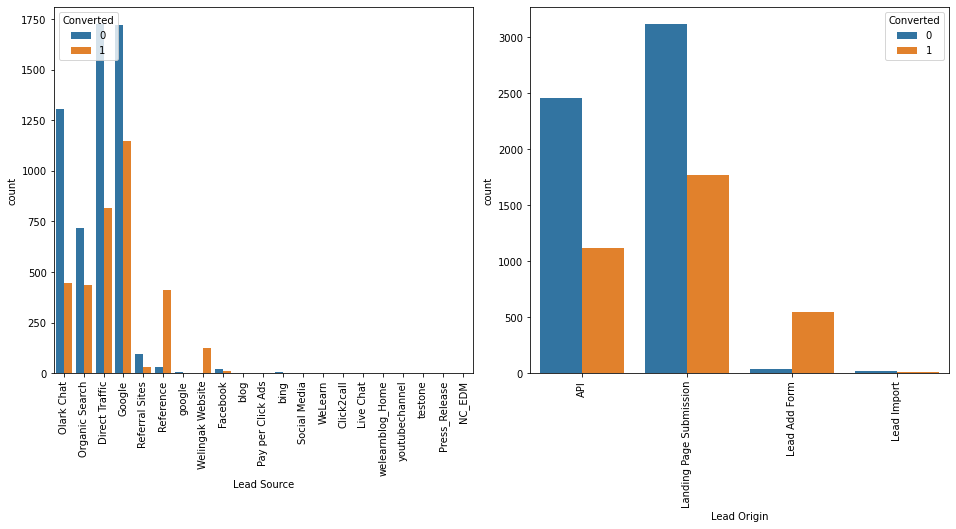

In [180]:
fig = plt.subplots(figsize = (20, 20))

for i, feature in enumerate(['Lead Source', 'Lead Origin']):
    plt.subplot(3, 3, i+1)
    plt.subplots_adjust(hspace = 10.0)
    sns.countplot(lead_df[feature], hue = lead_df["Converted"])
    plt.xticks(rotation = 90)
    plt.tight_layout()

In [181]:
# We can clearly observe that the count of leads from various sources are negligible 
# Hence we can club them to source category-"Others" for better visualisation and analysis

lead_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release', 
                                'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 
                                'youtubechannel'], 'Other_Lead_Source', inplace = True)


# Also replace google with Google as both are same, segregated because of case sensitivity

lead_df['Lead Source'].replace("google", 'Google', inplace = True)

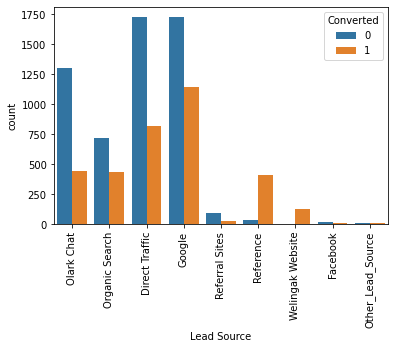

In [182]:
# Again Plotting the same Lead Source

sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)
plt.show()

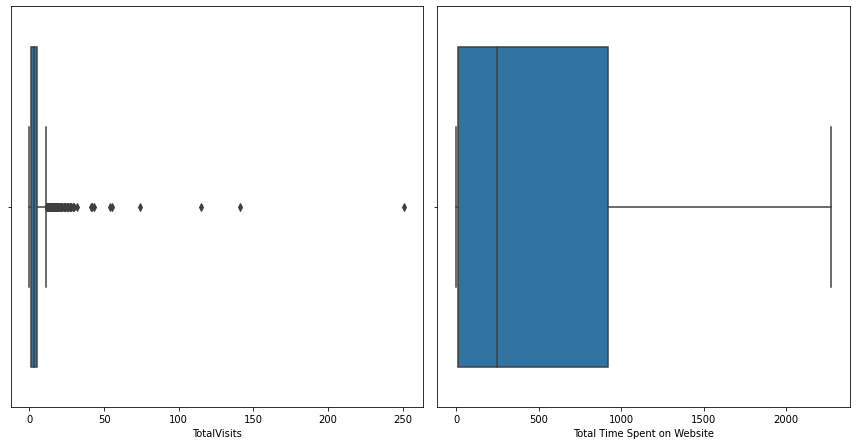

In [183]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 4.0)
    sns.boxplot(lead_df[feature])
    plt.tight_layout()

In [184]:
# There are many outliers in the Total Visits columns, cap this variable to 95 percetile 

lead_quan = lead_df["TotalVisits"].quantile(0.95)
lead_df["TotalVisits"][lead_df["TotalVisits"] >= lead_quan] = lead_quan

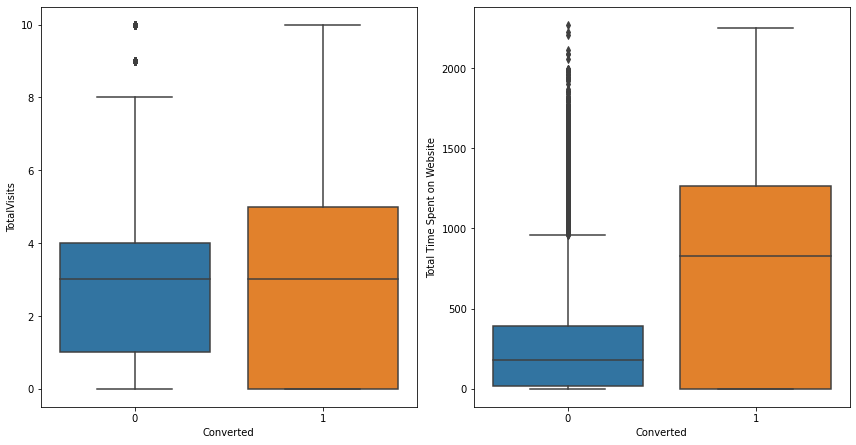

In [185]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(["TotalVisits", "Total Time Spent on Website"]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y = feature, x = 'Converted', data = lead_df)
    plt.tight_layout()

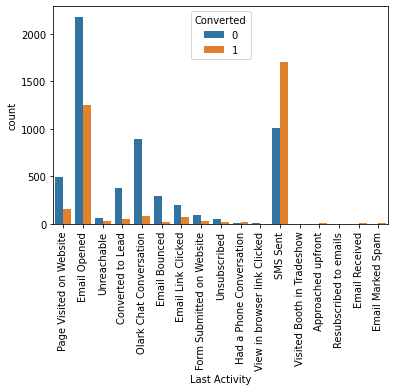

In [186]:
# Plotting Last Activity column 

sns.countplot(x = "Last Activity", hue = "Converted", data= lead_df)
plt.xticks(rotation = 'vertical')
plt.show()

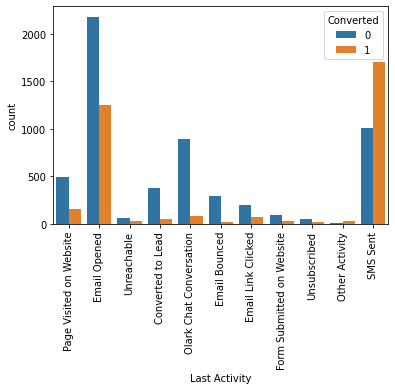

In [187]:
# Merge all low count categories into category-'Others'

lead_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 'Visited Booth in Tradeshow',
                                  'Approached upfront','Resubscribed to emails','Email Received', 
                                  'Email Marked Spam'], 'Other Activity', inplace = True)


# Plot 'Last Activity' again 

sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df)
plt.xticks(rotation = 'vertical')
plt.show()

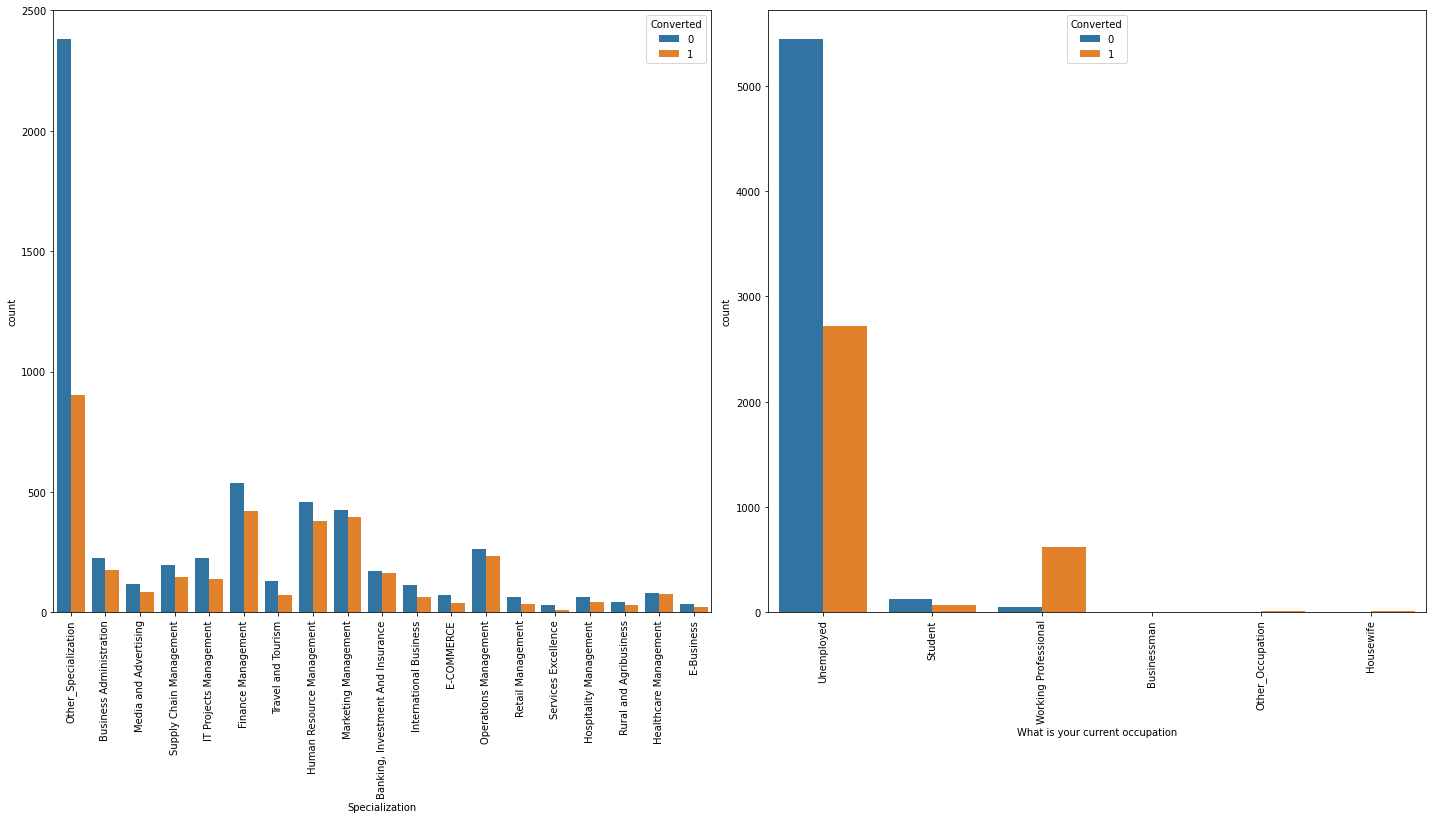

In [188]:
fig=plt.subplots(figsize=(20, 20))

for i, feature in enumerate(["Specialization", "What is your current occupation"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 4.0)
    sns.countplot(x = feature, hue = "Converted", data = lead_df)
    plt.xticks(rotation = 'vertical')
    plt.tight_layout()

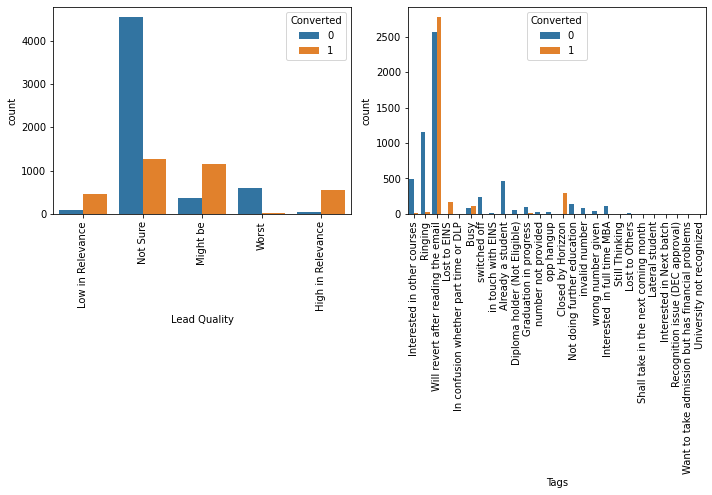

In [189]:
fig=plt.subplots(figsize=(10, 10))

for i, feature in enumerate(["Lead Quality", "Tags"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x = feature, hue = "Converted", data = lead_df)
    plt.xticks( rotation = 'vertical')
    plt.tight_layout()

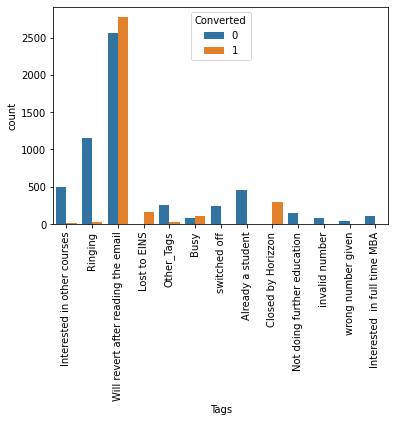

In [190]:
# Merge all low count categories to Others category

lead_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                        'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                        'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                        'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                        'University not recognized'], 'Other_Tags', inplace = True)


# Plot the Tags again
sns.countplot(x = "Tags", hue = "Converted", data= lead_df)
plt.xticks( rotation = 'vertical')
plt.show()

In [191]:
# Drop inessential columns

lead_df.drop(['Lead Number','What matters most to you in choosing a course','Search','Newspaper Article',
         'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
         'A free copy of Mastering The Interview','Country','Do Not Call'], axis = 1, inplace = True)

lead_df.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source  Do Not Email  Converted  TotalVisits  \
0      Olark Chat             0          0          0.0   
1  Organic Search             0          0          5.0   
2  Direct Traffic             0          1          2.0   
3  Direct Traffic             0          0          1.0   
4          Google             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

            Specialization What is your current occupation  \
0     Other_Specialization                      Unemployed   
1     Other_Specialization                      Unemployed   
2  Business Administration                         Student   
3    Media and Advertising                      Unemployed   
4     Other_Specialization                      Unemployed   

                                  Tags      Lead Quality    City  \
0          Interested in other courses  Low in Relevance  Mumbai   
1                              Ringing          Not Sure  Mumbai   
2  Will revert after reading the email          Might be  Mumbai   
3                              Ringing          Not Sure  Mumbai   
4  Will revert after reading the email          Might be  Mumbai   

  Last Notable Activity  
0              Modified  
1          Email Opened  
2          Email Opened  
3              Modified  
4              Modified

In [192]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Origin                      9074 non-null   object 
 2   Lead Source                      9074 non-null   object 
 3   Do Not Email                     9074 non-null   int64  
 4   Converted                        9074 non-null   int64  
 5   TotalVisits                      9074 non-null   float64
 6   Total Time Spent on Website      9074 non-null   int64  
 7   Page Views Per Visit             9074 non-null   float64
 8   Last Activity                    9074 non-null   object 
 9   Specialization                   9074 non-null   object 
 10  What is your current occupation  9074 non-null   object 
 11  Tags                             9074 non-null   object 
 12  Lead Quality        

# Create Dummy Variables

In [193]:
# Create a dummy variables for categorical attributes


lead_dummy = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','City','Last Notable Activity']], drop_first=True)
lead_dummy.head()

Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  Lead Source_Google  \
0                        0                     0                   0   
1                        0                     0                   0   
2                        0                     0                   0   
3                        0                     0                   0   
4                        0                     0                   1   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Other_Lead_Source  Lead Source_Reference  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   

   Lead Source_Referral Sites  ...  \
0                           0  ...   
1                           0  ...   
2                           0  ...   
3                           0  ...   
4                           0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0

In [194]:
#merging dataframe with dummy
lead_df = pd.concat([lead_df, lead_dummy], axis=1)
lead_df

Prospect ID              Lead Origin  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1     2a272436-5132-4136-86fa-dcc88c88f482                      API   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4     3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   
...                                    ...                      ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9  Landing Page Submission   
9236  82a7005b-7196-4d56-95ce-a79f937a158d  Landing Page Submission   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c  Landing Page Submission   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9  Landing Page Submission   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff  Landing Page Submission   

         Lead Source  Do Not Email  Converted  TotalVisits  \
0         Olark Chat             0          0          0.0   
1     Organic Search             0          0          5.0   
2     Direct Traffic             0          1          2.0   
3     Direct Traffic             0          0          1.0   
4             Google             0          1          2.0   
...              ...           ...        ...          ...   
9235  Direct Traffic             1          1          8.0   
9236  Direct Traffic             0          0          2.0   
9237  Direct Traffic             1          0          2.0   
9238          Google             0          1          3.0   
9239  Direct Traffic             0          1          6.0   

      Total Time Spent on Website  Page Views Per Visit  \
0                               0                  0.00   
1                             674                  2.50   
2                            1532                  2.00   
3                             305                  1.00   
4                            1428                  1.00   
...                           ...                   ...   
9235                         1845                  2.67   
9236                          238                  2.00   
9237                          199                  2.00   
9238                          499                  3.00   
9239                         1279                  3.00   

                Last Activity             Specialization  ...  \
0     Page Visited on Website       Other_Specialization  ...   
1                Email Opened       Other_Specialization  ...   
2                Email Opened    Business Administration  ...   
3                 Unreachable      Media and Advertising  ...   
4           Converted to Lead       Other_Specialization  ...   
...                       ...                        ...  ...   
9235           Other Activity     IT Projects Management  ...   
9236                 SMS Sent      Media and Advertising  ...   
9237                 SMS Sent    Business Administration  ...   
9238                 SMS Sent  Human Resource Management  ...   
9239                 SMS Sent    Supply Chain Management  ...   

     Last Notable Activity_Form Submitted on Website  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
9235                                               0   
9236                                               0   
9237                                               0   
9238                                               0   
9239                                               0   

     Last Notable Activity_Had a Phone Conversation  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 

In [195]:
#Droping the original columns 

lead_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
            'Tags','Lead Quality','City','Last Notable Activity'], axis=1, inplace = True)

lead_df.head()

Prospect ID  Do Not Email  Converted  TotalVisits  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620             0          0          0.0   
1  2a272436-5132-4136-86fa-dcc88c88f482             0          0          5.0   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a             0          1          2.0   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc             0          0          1.0   
4  3256f628-e534-4826-9d63-4a8b88782852             0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  \
0                            0                   0.0   
1                          674                   2.5   
2                         1532                   2.0   
3                          305                   1.0   
4                         1428                   1.0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Facebook  ...  \
0                        0                     0  ...   
1                        0                     0  ...   
2                        0                     0  ...   
3                        0                     0  ...   
4                        0                     0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4       

# Split dataframe into Test & Train

In [196]:
# Putting feature variable to X

X = lead_df.drop(['Prospect ID','Converted'], axis=1)


# Putting target variable to y

y = lead_df['Converted']

In [197]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=100)

In [198]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website',
         'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website',
                                                                  'Page Views Per Visit']])

In [199]:
# Check the Conversion Rate

print("Conversion rate is ", (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100)

Conversion rate is  37.85541106458012


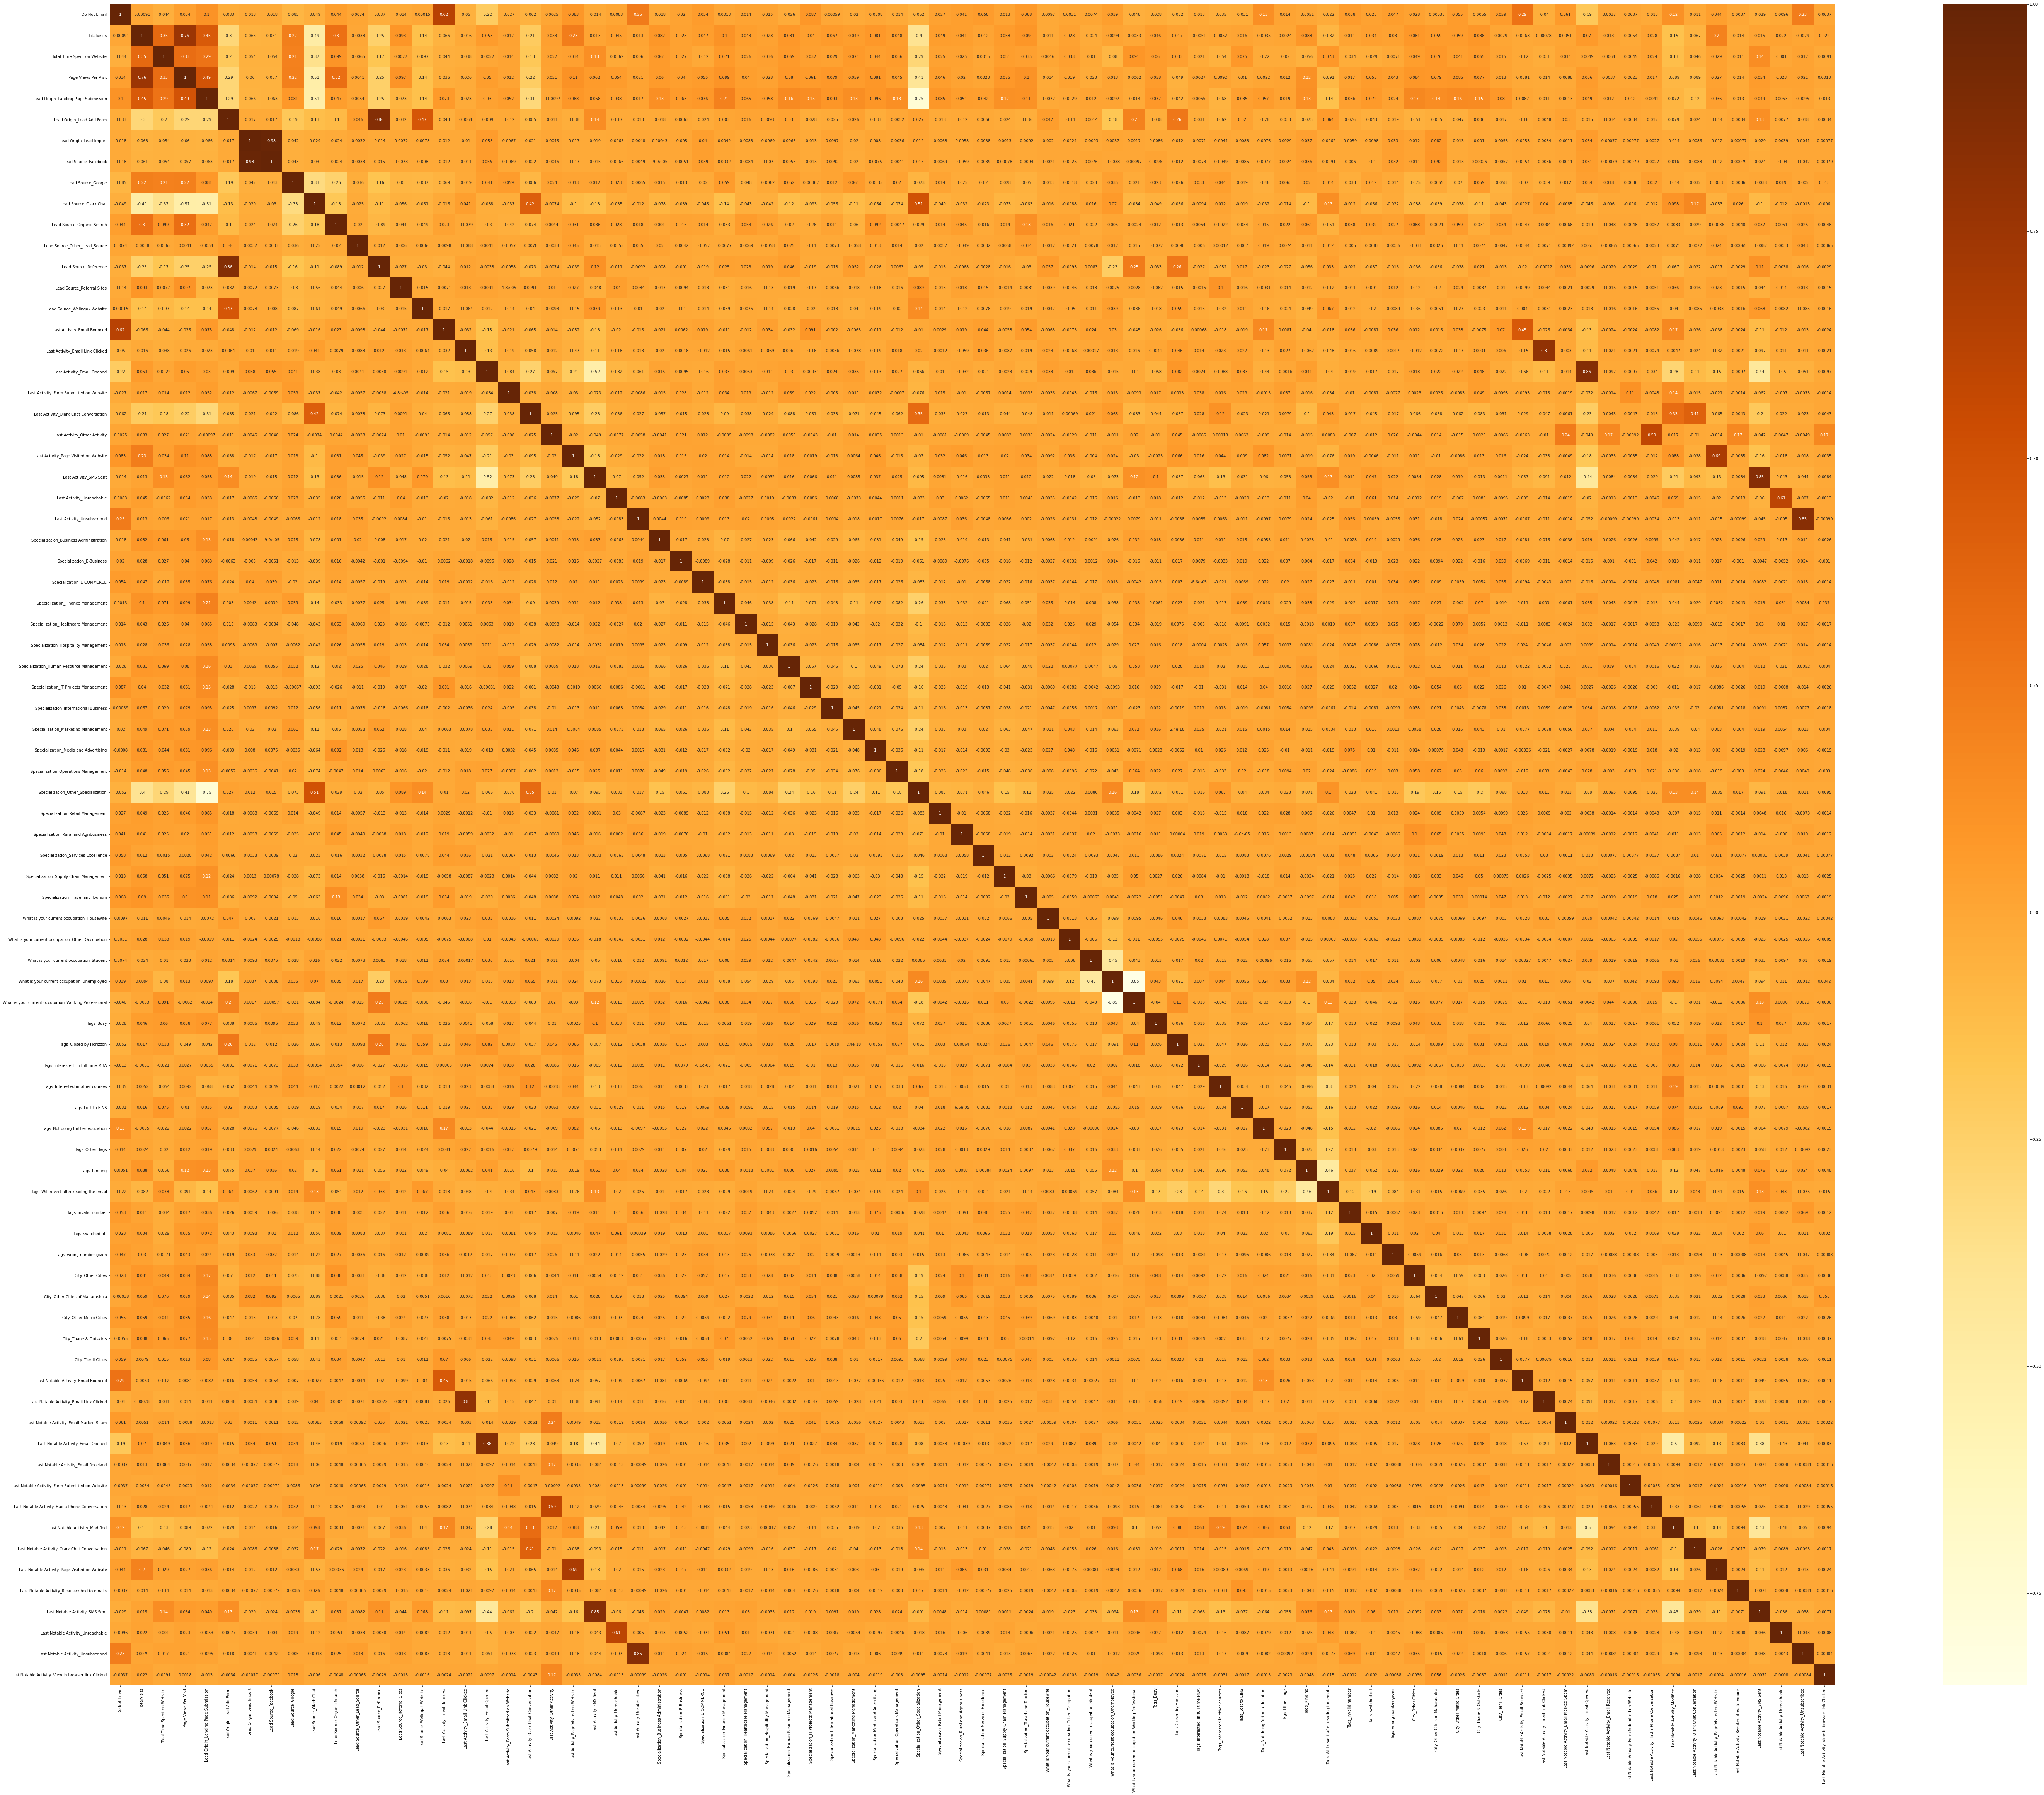

In [200]:
#Correlation check

plt.figure(figsize=(100,80))
sns.heatmap(X_train.corr(),annot=True,cmap='YlOrBr')
plt.show()

In [201]:
# Correlation between different numerical variables for both the Converted and not-converted cases
conv_corr = lead_df.corr()

# Unstacking the correlation matrix to find out top correlations
conv_corr_unstacked = conv_corr.unstack().sort_values(kind="quicksort")
conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Import                Lead Source_Facebook                             0.983684
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed               0.872656
Lead Origin_Lead Add Form              Lead Source_Reference                            0.866191
Last Activity_Email Opened             Last Notable Activity_Email Opened               0.861636
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                   0.853102
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked         0.800686
TotalVisits                            Page Views Per Visit                             0.737996
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website    0.691811
Do Not Email                           Last Activity_Email Bounced                      0.620041
Last Activity_Unreachable              Last Notable Activity_Unreachable                0.594369
dtype: float64

In [202]:
# Drop highly correlated features

X_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_Email Opened',
             'Last Notable Activity_SMS Sent', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Unreachable',
             'Last Notable Activity_Page Visited on Website'], axis = 1, inplace = True)

X_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed','Last Notable Activity_Email Opened',
             'Last Notable Activity_SMS Sent', 'Last Notable Activity_Email Link Clicked','Last Notable Activity_Unreachable',
             'Last Notable Activity_Page Visited on Website'], axis = 1, inplace = True)

In [203]:
# Correlation between different numerical variables for both the Converted and not-converted cases
conv_corr = X_train.corr()

conv_corr.where(np.triu(np.ones(conv_corr.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Add Form     Lead Source_Reference                             0.859537
TotalVisits                   Page Views Per Visit                              0.756104
Do Not Email                  Last Activity_Email Bounced                       0.624939
Last Activity_Other Activity  Last Notable Activity_Had a Phone Conversation    0.593057
Lead Source_Olark Chat        Specialization_Other_Specialization               0.505771
Page Views Per Visit          Lead Origin_Landing Page Submission               0.493007
Lead Origin_Lead Add Form     Lead Source_Welingak Website                      0.468225
Last Activity_Email Bounced   Last Notable Activity_Email Bounced               0.450911
TotalVisits                   Lead Origin_Landing Page Submission               0.447765
Lead Source_Olark Chat        Last Activity_Olark Chat Conversation             0.419173
dtype: float64

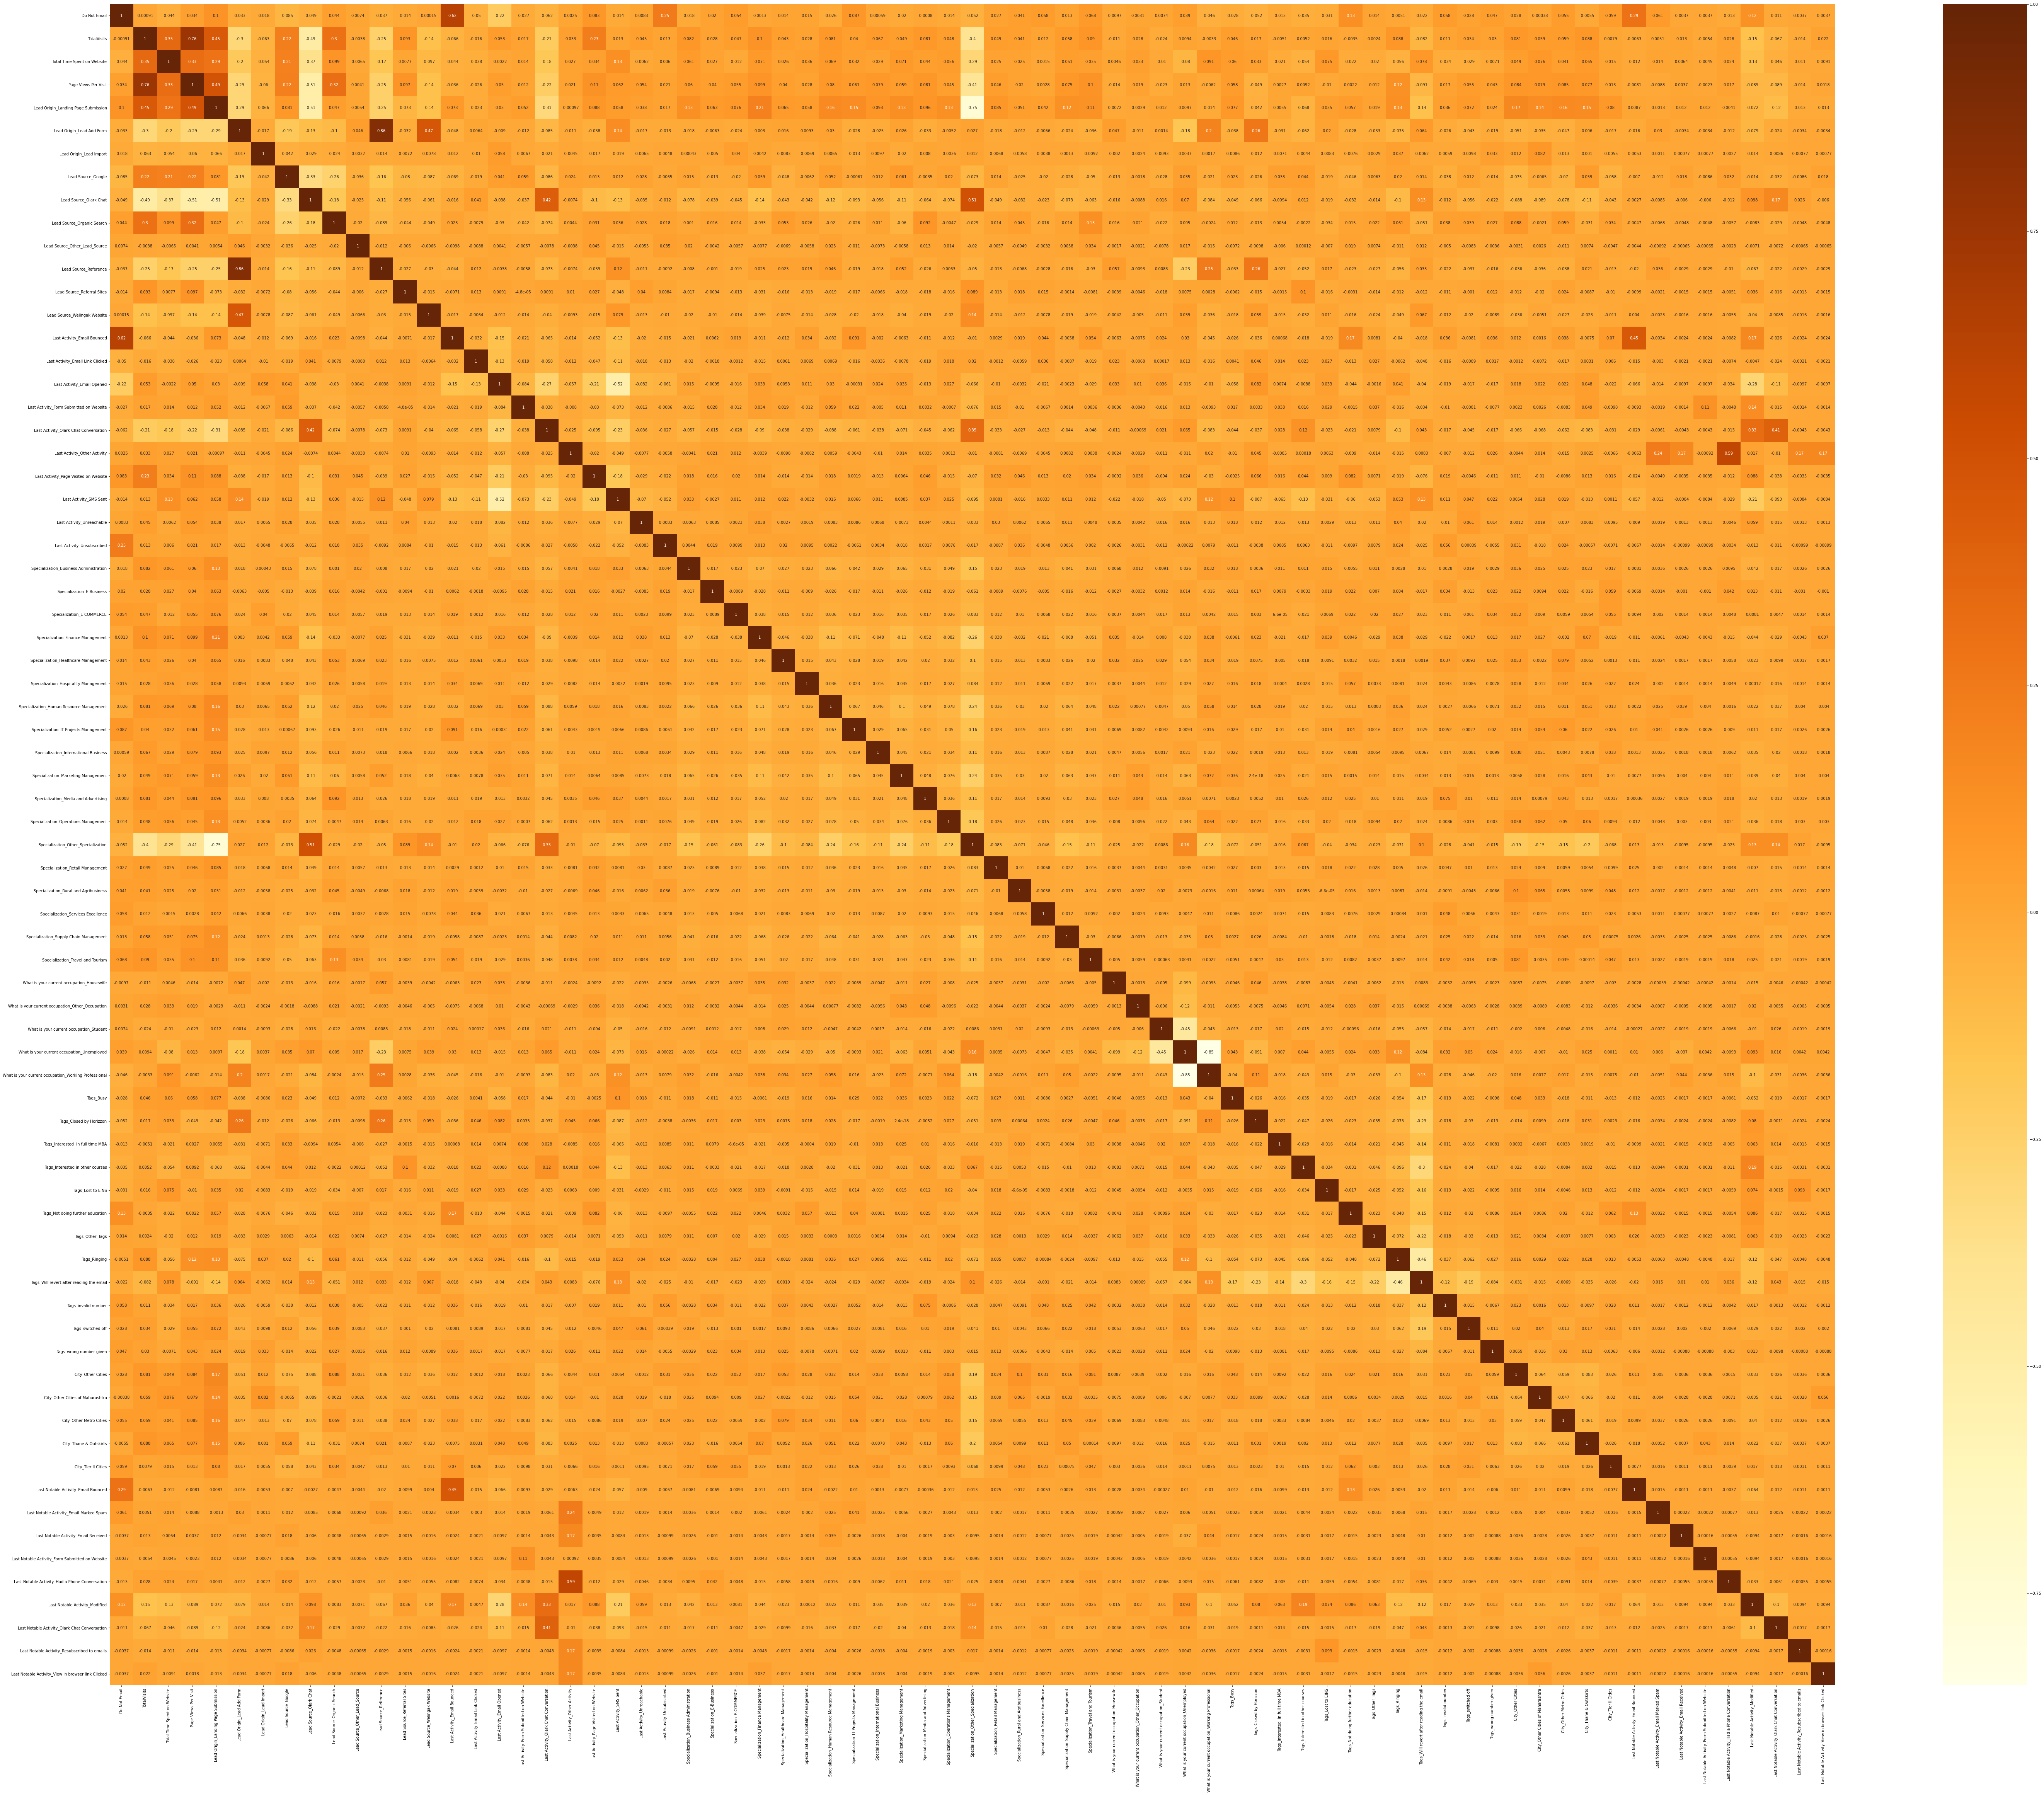

In [204]:
#Correlation check

plt.figure(figsize=(100,80))
sns.heatmap(X_train.corr(),annot=True,cmap='YlOrBr')
plt.show()


# Step-5: Model Building

In [205]:
lr = LogisticRegression()

In [206]:
# Run RFE with 20 variables as output
rfe = RFE(lr, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)

In [207]:
rfe.support_

array([ True, False,  True, False,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True,  True, False, False,  True, False, False,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False])

In [208]:
# List of variables selected in top 20 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 25),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 5),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Olark Chat', False, 7),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Other_Lead_Source', False, 38),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral Sites', False, 45),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 17),
 ('Last Activity_Email Link Clicked', False, 13),
 ('Last Activity_Email Opened', False, 16),
 ('Last Activity_Form Submitted on Website', False, 46),
 ('Last Activity_Olark Chat Conversation', False, 14),
 ('Last Activity_Other Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 15),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 3),
 ('Last 

In [209]:
# Checking which columns have been selected
col = X_train.columns[rfe.support_]
X_train = X_train[col]

In [210]:
# Creating dataframe with RFE selected variables

X_train_sm = sm.add_constant(X_train)
log_m = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_m.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1638.6
Date:                Tue, 13 Sep 2022   Deviance:                       3277.2
Time:                        14:09:45   Pearson chi2:                 9.85e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5583
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7084      0.367     -4.651      0.000      -2.428      -0.988
Do Not Email                                            -1.6183      0.236     -6.857      0.000      -2.081      -1.156
Total Time Spent on Website                              4.3481      0.205     21.251      0.000       3.947       4.749
Lead Origin_Landing Page Submission                     -1.6739      0.163    -10.300      0.000      -1.992      -1.355
Lead Origin_Lead Add Form                                2.2770      0.327      6.966      0.000       1.636       2.918
Lead Source_Welingak Website                             2.0950      0.801      2.615      0.009       0.525       3.665
Last Activity_Other Activity                             1.9656      0.645      3.047      0.002       0.701       3.230
Last Activity_SMS Sent                                   2.0063      0.102     19.616      0.000       1.806       2.207
Last Activity_Unsubscribed                               1.7236      0.633      2.725      0.006       0.484       2.964
Specialization_Other_Specialization                     -1.3864      0.163     -8.491      0.000      -1.706      -1.066
What is your current occupation_Unemployed              -1.6663      0.332     -5.016      0.000      -2.317      -1.015
What is your current occupation_Working Professional     1.0717      0.421      2.547      0.011       0.247       1.897
Tags_Busy                                                2.8714      0.313      9.170      0.000       2.258       3.485
Tags_Closed by Horizzon                                  8.8356      0.762     11.599      0.000       7.343      10.329
Tags_Lost to EINS                                        8.5912      0.766     11.215      0.000       7.090      10.093
Tags_Ringing                                            -1.2700      0.324     -3.924      0.000      -1.904      -0.636
Tags_Will revert after reading the email                 3.5860      0.216     16.597      0.000       3.163       4.010
Tags_invalid number                                    -21.0285   1.49e+04     -0.001      0.999   -2.93e+04    2.92e+04
Tags_switched off                                       -0.9522      0.580     -1.641      0.101      -2.089       0.185
Last Notable Activity_Modified                          -1.6622      0.104    -15.937      0.000      -1.867      -1.458
Last Notable Activity_Olark Chat Conversation           -1.8003      0.379     -4.753      0.000      -2.543      -1.058
========================================================================================================================
"""

In [211]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.334689
1012    0.204553
9226    0.003378
4750    0.962290
7987    0.999071
1281    0.921713
2880    0.189278
4971    0.988749
7536    0.916916
1248    0.045203
dtype: float64

In [212]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.33468904, 0.20455279, 0.00337817, 0.96228951, 0.99907129,
       0.92171347, 0.18927765, 0.9887492 , 0.91691566, 0.0452029 ])

In [213]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.334689
1          0         0.204553
2          0         0.003378
3          1         0.962290
4          1         0.999071

In [214]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.334689          0
1          0         0.204553          0
2          0         0.003378          0
3          1         0.962290          1
4          1         0.999071          1

In [215]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3655,  250],
       [ 344, 2102]], dtype=int64)

In [216]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.906471421823335

In [217]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                                        Do Not Email  52.57
11                                          Tags_Busy   3.86
10  What is your current occupation_Working Profes...   3.74
3                           Lead Origin_Lead Add Form   3.02
9          What is your current occupation_Unemployed   2.94
16                                Tags_invalid number   2.03
4                        Lead Source_Welingak Website   1.87
15           Tags_Will revert after reading the email   1.68
5                        Last Activity_Other Activity   1.38
13                                  Tags_Lost to EINS   1.31
2                 Lead Origin_Landing Page Submission   1.24
19      Last Notable Activity_Olark Chat Conversation   1.20
7                          Last Activity_Unsubscribed   1.18
18                     Last Notable Activity_Modified   1.15
12                            Tags_Closed by Horizzon   1.14
1                         Total Time Spent on Website   1.11
14                                       Tags_Ringing   1.11
8                 Specialization_Other_Specialization   1.08
17                                  Tags_switched off   1.06
6                              Last Activity_SMS Sent   1.01

In [218]:
X_train.drop(['Tags_invalid number'], axis = 1, inplace = True)

In [219]:
X_train_sm = sm.add_constant(X_train)
log_m = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_m.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1640.6
Date:                Tue, 13 Sep 2022   Deviance:                       3281.1
Time:                        14:09:47   Pearson chi2:                 9.94e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5580
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7492      0.370     -4.730      0.000      -2.474      -1.024
Do Not Email                                            -1.6198      0.236     -6.865      0.000      -2.082      -1.157
Total Time Spent on Website                              4.3603      0.205     21.312      0.000       3.959       4.761
Lead Origin_Landing Page Submission                     -1.6834      0.163    -10.344      0.000      -2.002      -1.364
Lead Origin_Lead Add Form                                2.2865      0.328      6.977      0.000       1.644       2.929
Lead Source_Welingak Website                             2.0874      0.802      2.604      0.009       0.516       3.658
Last Activity_Other Activity                             1.9704      0.648      3.043      0.002       0.701       3.240
Last Activity_SMS Sent                                   1.9990      0.102     19.586      0.000       1.799       2.199
Last Activity_Unsubscribed                               1.7155      0.631      2.719      0.007       0.479       2.952
Specialization_Other_Specialization                     -1.3911      0.164     -8.506      0.000      -1.712      -1.071
What is your current occupation_Unemployed              -1.7010      0.334     -5.087      0.000      -2.356      -1.046
What is your current occupation_Working Professional     1.0518      0.424      2.481      0.013       0.221       1.883
Tags_Busy                                                2.9555      0.311      9.502      0.000       2.346       3.565
Tags_Closed by Horizzon                                  8.9121      0.761     11.705      0.000       7.420      10.404
Tags_Lost to EINS                                        8.6683      0.766     11.322      0.000       7.168      10.169
Tags_Ringing                                            -1.1873      0.322     -3.691      0.000      -1.818      -0.557
Tags_Will revert after reading the email                 3.6659      0.214     17.140      0.000       3.247       4.085
Tags_switched off                                       -0.8674      0.579     -1.498      0.134      -2.003       0.268
Last Notable Activity_Modified                          -1.6576      0.104    -15.887      0.000      -1.862      -1.453
Last Notable Activity_Olark Chat Conversation           -1.8047      0.379     -4.759      0.000      -2.548      -1.061
========================================================================================================================
"""

In [220]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.334024
1012    0.205294
9226    0.003377
4750    0.962109
7987    0.999069
1281    0.921198
2880    0.188490
4971    0.988855
7536    0.917347
1248    0.045336
dtype: float64

In [221]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.3340242 , 0.20529371, 0.00337733, 0.96210908, 0.99906946,
       0.9211975 , 0.18849025, 0.98885497, 0.91734666, 0.04533564])

In [222]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.334024
1          0         0.205294
2          0         0.003377
3          1         0.962109
4          1         0.999069

In [223]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.334024          0
1          0         0.205294          0
2          0         0.003377          0
3          1         0.962109          1
4          1         0.999069          1

In [224]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3654,  251],
       [ 344, 2102]], dtype=int64)

In [225]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.906313966304519

In [226]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
9          What is your current occupation_Unemployed  12.25
2                 Lead Origin_Landing Page Submission   5.42
15           Tags_Will revert after reading the email   4.62
8                 Specialization_Other_Specialization   3.90
1                         Total Time Spent on Website   2.17
10  What is your current occupation_Working Profes...   1.95
3                           Lead Origin_Lead Add Form   1.90
14                                       Tags_Ringing   1.85
17                     Last Notable Activity_Modified   1.83
6                              Last Activity_SMS Sent   1.70
4                        Lead Source_Welingak Website   1.39
12                            Tags_Closed by Horizzon   1.34
0                                        Do Not Email   1.21
16                                  Tags_switched off   1.17
11                                          Tags_Busy   1.15
13                                  Tags_Lost to EINS   1.12
7                          Last Activity_Unsubscribed   1.08
18      Last Notable Activity_Olark Chat Conversation   1.07
5                        Last Activity_Other Activity   1.01

In [227]:
X_train.drop(['Tags_switched off'], axis = 1, inplace = True)

In [228]:
X_train_sm = sm.add_constant(X_train)
log_m = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_m.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1641.9
Date:                Tue, 13 Sep 2022   Deviance:                       3283.7
Time:                        14:09:48   Pearson chi2:                 9.07e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5578
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8191      0.373     -4.871      0.000      -2.551      -1.087
Do Not Email                                            -1.6253      0.236     -6.899      0.000      -2.087      -1.164
Total Time Spent on Website                              4.3612      0.205     21.319      0.000       3.960       4.762
Lead Origin_Landing Page Submission                     -1.6968      0.163    -10.392      0.000      -2.017      -1.377
Lead Origin_Lead Add Form                                2.3019      0.329      6.992      0.000       1.657       2.947
Lead Source_Welingak Website                             2.0760      0.802      2.588      0.010       0.504       3.648
Last Activity_Other Activity                             1.9771      0.652      3.034      0.002       0.700       3.254
Last Activity_SMS Sent                                   1.9828      0.101     19.560      0.000       1.784       2.182
Last Activity_Unsubscribed                               1.7235      0.632      2.727      0.006       0.485       2.962
Specialization_Other_Specialization                     -1.4031      0.164     -8.553      0.000      -1.725      -1.082
What is your current occupation_Unemployed              -1.7623      0.337     -5.224      0.000      -2.423      -1.101
What is your current occupation_Working Professional     1.0149      0.429      2.366      0.018       0.174       1.856
Tags_Busy                                                3.1073      0.300     10.362      0.000       2.520       3.695
Tags_Closed by Horizzon                                  9.0479      0.758     11.930      0.000       7.561      10.534
Tags_Lost to EINS                                        8.8061      0.762     11.550      0.000       7.312      10.300
Tags_Ringing                                            -1.0338      0.310     -3.330      0.001      -1.642      -0.425
Tags_Will revert after reading the email                 3.8100      0.200     19.036      0.000       3.418       4.202
Last Notable Activity_Modified                          -1.6497      0.104    -15.825      0.000      -1.854      -1.445
Last Notable Activity_Olark Chat Conversation           -1.8066      0.380     -4.758      0.000      -2.551      -1.062
========================================================================================================================
"""

In [229]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.33395089, 0.20633383, 0.00338457, 0.96151945, 0.99905595,
       0.92001261, 0.18841603, 0.98891146, 0.91736918, 0.04539322])

In [230]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.333951
1          0         0.206334
2          0         0.003385
3          1         0.961519
4          1         0.999056

In [231]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.333951          0
1          0         0.206334          0
2          0         0.003385          0
3          1         0.961519          1
4          1         0.999056          1

In [232]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3655,  250],
       [ 344, 2102]], dtype=int64)

In [233]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.906471421823335

In [234]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
9          What is your current occupation_Unemployed  11.78
2                 Lead Origin_Landing Page Submission   5.39
15           Tags_Will revert after reading the email   4.17
8                 Specialization_Other_Specialization   3.90
1                         Total Time Spent on Website   2.16
10  What is your current occupation_Working Profes...   1.92
3                           Lead Origin_Lead Add Form   1.90
16                     Last Notable Activity_Modified   1.82
14                                       Tags_Ringing   1.73
6                              Last Activity_SMS Sent   1.68
4                        Lead Source_Welingak Website   1.39
12                            Tags_Closed by Horizzon   1.32
0                                        Do Not Email   1.21
11                                          Tags_Busy   1.13
13                                  Tags_Lost to EINS   1.11
7                          Last Activity_Unsubscribed   1.08
17      Last Notable Activity_Olark Chat Conversation   1.07
5                        Last Activity_Other Activity   1.01

In [235]:
X_train.drop(['What is your current occupation_Unemployed'], axis = 1, inplace = True)

In [236]:
X_train_sm = sm.add_constant(X_train)
log_m = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = log_m.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1655.9
Date:                Tue, 13 Sep 2022   Deviance:                       3311.8
Time:                        14:09:49   Pearson chi2:                 8.71e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5558
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4109      0.237    -14.401      0.000      -3.875      -2.947
Do Not Email                                            -1.6042      0.235     -6.838      0.000      -2.064      -1.144
Total Time Spent on Website                              4.3700      0.204     21.442      0.000       3.971       4.769
Lead Origin_Landing Page Submission                     -1.6864      0.163    -10.331      0.000      -2.006      -1.366
Lead Origin_Lead Add Form                                2.3308      0.326      7.159      0.000       1.693       2.969
Lead Source_Welingak Website                             2.0381      0.800      2.546      0.011       0.469       3.607
Last Activity_Other Activity                             1.9304      0.649      2.974      0.003       0.658       3.203
Last Activity_SMS Sent                                   1.9510      0.101     19.404      0.000       1.754       2.148
Last Activity_Unsubscribed                               1.6545      0.630      2.626      0.009       0.419       2.890
Specialization_Other_Specialization                     -1.4230      0.164     -8.655      0.000      -1.745      -1.101
What is your current occupation_Working Professional     2.7138      0.281      9.664      0.000       2.163       3.264
Tags_Busy                                                2.9711      0.296     10.045      0.000       2.391       3.551
Tags_Closed by Horizzon                                  8.8972      0.756     11.765      0.000       7.415      10.379
Tags_Lost to EINS                                        8.6652      0.760     11.397      0.000       7.175      10.155
Tags_Ringing                                            -1.1850      0.306     -3.868      0.000      -1.785      -0.585
Tags_Will revert after reading the email                 3.6789      0.194     18.921      0.000       3.298       4.060
Last Notable Activity_Modified                          -1.6569      0.104    -15.944      0.000      -1.861      -1.453
Last Notable Activity_Olark Chat Conversation           -1.7878      0.373     -4.789      0.000      -2.519      -1.056
========================================================================================================================
"""

In [237]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)

# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)

y_train_pred[:10]

array([0.34546023, 0.20441492, 0.00325333, 0.96237423, 0.99906278,
       0.92160098, 0.1961428 , 0.98900364, 0.92163046, 0.04524673])

In [238]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

Converted  Conversion_Prob
0          0         0.345460
1          0         0.204415
2          0         0.003253
3          1         0.962374
4          1         0.999063

In [239]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted
0          0         0.345460          0
1          0         0.204415          0
2          0         0.003253          0
3          1         0.962374          1
4          1         0.999063          1

In [240]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3653,  252],
       [ 351, 2095]], dtype=int64)

In [241]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9050543221539915

In [242]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
14           Tags_Will revert after reading the email  3.39
2                 Lead Origin_Landing Page Submission  3.19
8                 Specialization_Other_Specialization  2.42
1                         Total Time Spent on Website  2.10
3                           Lead Origin_Lead Add Form  1.77
15                     Last Notable Activity_Modified  1.69
6                              Last Activity_SMS Sent  1.67
13                                       Tags_Ringing  1.53
4                        Lead Source_Welingak Website  1.37
11                            Tags_Closed by Horizzon  1.29
9   What is your current occupation_Working Profes...  1.23
0                                        Do Not Email  1.21
12                                  Tags_Lost to EINS  1.10
10                                          Tags_Busy  1.10
7                          Last Activity_Unsubscribed  1.08
16      Last Notable Activity_Olark Chat Conversation  1.07
5                        Last Activity_Other Activity  1.01

In [243]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3653,  252],
       [ 351, 2095]], dtype=int64)

In [244]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9050543221539915

# Metrics beyond simply accuracy

In [245]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [246]:
# Calculating the sensitivity
TP/(TP+FN)

0.8565004088307441

In [247]:
# Calculating the specificity
TN/(TN+FP)

0.9354673495518566

In [248]:
# Calculate false positive rate
print(FP/(TN+FP))

0.06453265044814341


In [249]:
# Positive Predictive value
print(TP/(TP+FP))

0.8926288879420536


In [250]:
# Negative Predictive Value
print(TN/(TN+FN))

0.9123376623376623


# Plotting ROC Curve

In [251]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [252]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

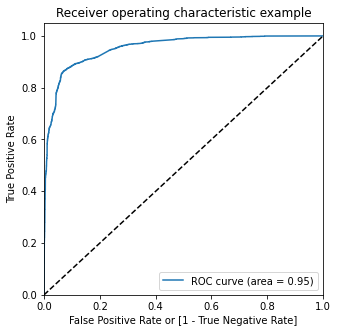

In [253]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

# Finding the CutOff Value

In [254]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0         0.345460          0    1    1    1    1    0    0    0   
1          0         0.204415          0    1    1    1    0    0    0    0   
2          0         0.003253          0    1    0    0    0    0    0    0   
3          1         0.962374          1    1    1    1    1    1    1    1   
4          1         0.999063          1    1    1    1    1    1    1    1   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    1    1  
4    1    1    1

In [255]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.799559  0.967702  0.694238
0.2   0.2  0.822863  0.952576  0.741613
0.3   0.3  0.876712  0.901881  0.860948
0.4   0.4  0.900488  0.874080  0.917029
0.5   0.5  0.905054  0.856500  0.935467
0.6   0.6  0.896552  0.818479  0.945455
0.7   0.7  0.868997  0.723630  0.960051
0.8   0.8  0.851834  0.646770  0.980282
0.9   0.9  0.822075  0.555601  0.988988


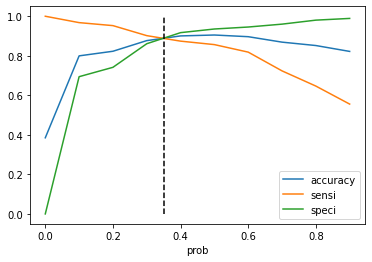

In [256]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.35,ymax = 1.0,ymin=0.0,color='black',linestyle='--')
plt.show()

# Precision-Recall

In [257]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3653,  252],
       [ 351, 2095]], dtype=int64)

In [258]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8926288879420536

In [259]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8565004088307441

In [260]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8926288879420536

In [261]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8565004088307441

# Precision and recall tradeoff

In [262]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [263]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

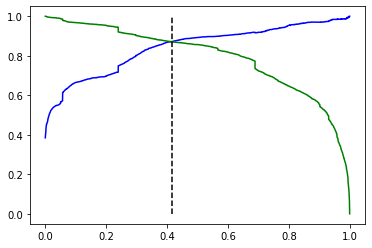

In [264]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "g-")
plt.vlines(x=0.415,ymax = 1.0,ymin=0.0,color='black',linestyle='--')
plt.show()

In [265]:
# Evaluating model performance on training data


y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

Converted  Conversion_Prob  Predicted  final_predicted  Lead_Score
0          0         0.345460          0                0          35
1          0         0.204415          0                0          20
2          0         0.003253          0                0           0
3          1         0.962374          1                1          96
4          1         0.999063          1                1         100

In [266]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8921429696110849

In [267]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3495,  410],
       [ 275, 2171]], dtype=int64)

In [268]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [269]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.8411468423091825

In [270]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8875715453802125

# Prediction on Test set

In [284]:
X_test[['TotalVisits', 'Page Views Per Visit', 
        'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 
                                                                   'Total Time Spent on Website']])



In [285]:
col = X_train.columns

In [286]:
X_test_sm = sm.add_constant(X_test[col])

In [287]:
y_test_pred = res.predict(X_test_sm)

y_pred_df = pd.DataFrame(y_test_pred)

y_test_df = pd.DataFrame(y_test)

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)


y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

Converted  Conversion_Prob
0          0         0.509014
1          1         0.999997
2          0         0.355799
3          1         0.997893
4          0         0.456561

In [288]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [289]:
y_pred_final.head()

Converted  Conversion_Prob  final_predicted
0          0         0.509014                1
1          1         0.999997                1
2          0         0.355799                1
3          1         0.997893                1
4          0         0.456561                1

In [290]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7723099522585384

In [291]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1185,  549],
       [  71,  918]], dtype=int64)

In [292]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [293]:
# Calculating the sensitivity
TP/(TP+FN)

0.9282103134479271

In [294]:
# Calculating the specificity
TN/(TN+FP)

0.6833910034602076

In [295]:
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.6257668711656442

In [296]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9282103134479271